# Perceptron training

In [6]:
import numpy as np
import matplotlib.pyplot as plt

We consider the binary classification of labels $\mathcal{Y}=\{-1,1\}$. A perceptron is a model based on a linear decision boundary given by $f_{w,b}(x)\triangleq w^Tx+b$ and corresponding classifier $\hat y_{w,b}(x)=\text{sign}(f_{w,b}(x))$, which attempts to minimize the Bayes risk, defined for $f:\mathbb{R}^d\to \{-1,1\}$ by:

$$\mathcal{R}(f)\triangleq \mathbb{P}(f(X)\neq Y)$$

In the following we consider data sampled from a distribution $(X,Y)\in \mathbb{R}^d\times\{-1,1\}$ and our goal is to solve:
$$\inf_{(w,b)\in \mathbb{R}^{d+1}}\mathcal{R}(\hat y_{w,b})\quad (1).$$

We propose to minimize the empirical risk obtained from $n$ iid samples:

$$\mathcal{R}_n(\hat y_{w,b})\triangleq \frac 1n\sum_{i=1}^n1_{\hat y_{w,b}(X_i)\neq Y_i}$$

which leads to the minimization:

$$\inf_{(w,b)\in \mathbb{R}^{d+1}}\mathcal{R}_n(\hat y_{w,b})\quad (2)$$.

__Q1 (Minimization of the empirical risk):__ Compute $\mathbb{E}[\mathcal{R}_n(\hat y_{w,b})]$.

$\mathbb{E}[\mathcal{R}_n(\hat y_{w,b})]$ = 1/n * $\sum_{i=1}^n\mathbb{P}({\hat y_{w,b}(X_i)\neq Y_i})$ = $\mathbb{P}({\hat y_{w,b}(X_1)\neq Y_1})$


Bcause ll the  samples are i.i.d

Si on avait accès a R appelé le risque, on pourrait essayer de minimiser R. Mais on a pas accès a R donc on utilise $\hat R_n$ comme proxy

__Q2 (Dataset generation):__ (a) Propose two functions to generate some data obtained from the following densities (verify they are densities!): 

$p_1(x,y)=\frac 121_{y=-1}\frac{1}{(2\pi)^{d/2}4\sigma^d}e^{-\frac{\Vert x\Vert ^2}{32\sigma^2}}+\frac 121_{y=1}\frac{1}{\sigma^d(2\pi)^{d/2}}e^{-\frac{\Vert x\Vert ^2}{2\sigma^2}}$ and $p_2(x,y)=\frac 121_{y=-1}\frac{1}{(2\pi)^{d/2}\sigma^d}e^{-\frac{\Vert x\Vert^2}{2\sigma^2}}+\frac 121_{y=1}(\frac 12\frac{1}{(2\pi)^{d/2}\sigma^d}e^{-\frac{\Vert x-e_1\Vert^2}{2\sigma^2}}+\frac 12\frac{1}{(2\pi)^{d/2}\sigma^d}e^{-\frac{\Vert x-10e_{1}\Vert^2}{2\sigma^2}})$. Here, $e_1$ is the first vector of the canonical basis.




Here by identifiying to gaussian densities wwe can se that the 2 following densities are densities. ( il faut integrer sur x la somme pr les y=1. et y=-1 de p1(x,y) et p2(x,y).
Y = -1 ou 1 avec proba 1/2.

Pour p1 : X sachant Y suit une loi N(O,In* σ^2) si Y=1 et N(0,16*In* σ^2) si Y=-1

Pour p2 : X sachant Y suit une loi  N(0,In* σ^2) si Y=-1

Z = -1 ou 1 avec proba 1/2.

X sachant Y suit une loi si Y=1 : Z=1 : N(e1,In* σ^2) si Y=1 : Z=-1 : N(10*e1,In* σ^2)



(b) Plot 100 points samples from $p_1,p_2$ respectively.

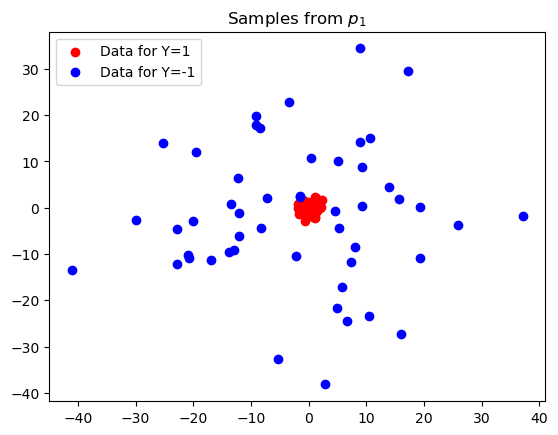

In [72]:
def sample_from_distribution_1(d=2,N=1,sigma=1):
    """
    Return the N samples following distribution p_1
    
    Parameters:
        - d (int): ambient dimension.
        - N (int): number of samples.
        - sigma (float): variance of the distribution.
    Returns:
        - X (np.array): samples of shape (N,d).
        - Y (np.array): labels with values in {-1,1} of shape (N).
    """
    X = np.zeros((N,d))
    Y = np.zeros(N)
    
    for k in range(N):
        x = np.zeros(2)
        y = 2 * (np.random.uniform() >= 1/2)  -1
        if y==-1:
            x[0] = np.random.normal(0,16*(sigma**2))
            x[1] = np.random.normal(0,16*(sigma**2))
        else:
            x[0]= np.random.normal(0,sigma**2)
            x[1] = np.random.normal(0,sigma**2)
        X[k,:] = x
        Y[k] = y

    return X, Y

X1,Y1=sample_from_distribution_1(N=100,sigma=1)


plt.scatter(X1[Y1==1,0],X1[Y1==1,1],label='Data for Y=1',c='r')
plt.scatter(X1[Y1==-1,0],X1[Y1==-1,1],label='Data for Y=-1',c='b')
plt.title('Samples from $p_1$')
plt.legend()
plt.show()

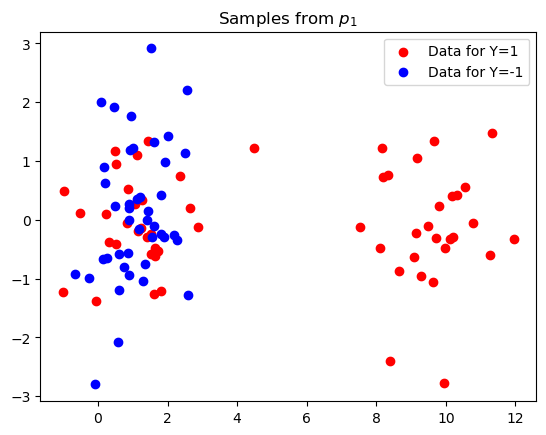

In [73]:
def sample_from_distribution_2(d=2,N=1,sigma=1):
    """
    Return the N samples following distribution p_2
    
    Parameters:
        - d (int): ambien dimension.
        - N (int): number of samples.
        - sigma (float): variance of the distribution.
    Returns:
        - X (np.array): samples of shape (N,d).
        - Y (np.array): labels with values in {-1,1} of shape (d).
    """

    X = np.zeros((N,d))
    Y = np.zeros(N)
    
    e1 = np.zeros(N)
    e1[0]=1
    
    for k in range(N):
        x = np.zeros(2)
        y = 2 * (np.random.uniform() >= 1/2)  -1
        if y==-1:
            x[0] = np.random.normal(1 ,(sigma**2))
            x[1] = np.random.normal(0 ,(sigma**2))
        else:
            z = 2 * (np.random.uniform() >= 1/2)  -1
            if z==-1:
                x[0] = np.random.normal(1 ,(sigma**2))
                x[1] = np.random.normal(0 ,(sigma**2))
            else:
                x[0] = np.random.normal(10 ,(sigma**2))
                x[1] = np.random.normal(0 ,(sigma**2))
    
        X[k,:] = x
        Y[k] = y

    return X, Y



X2,Y2=sample_from_distribution_2(N=100,sigma=1)


plt.scatter(X2[Y2==1,0],X2[Y2==1,1],label='Data for Y=1',c='r')
plt.scatter(X2[Y2==-1,0],X2[Y2==-1,1],label='Data for Y=-1',c='b')
plt.title('Samples from $p_1$')
plt.legend()
plt.show()

__Q3 (Classic perceptron (Rosenblatt, 1957)):__ The classical algorithm to minimize (1) is given by:
        
````
for t=1..T
   sample i in {1,...,n}
   if Y_i(w^T.X_i+b)<0 then
      w <- w + Y_i X_i
      b <- b + Y_i b
````

Implement this strategy with a tracker of the training error accross iterations.

In [74]:
def train_classic_perceptron(X,Y,T):
    """
    Train a perceptron using the Rosenblatt's algorithm.
    
    Parameters:
        - X (np.array): input samples.
        - Y (np.array): labels
        - T (int): number of iterations
    Returns:
        - w (np.array): vector of size (d).
        - b (np.array): bias of size (1).
        - error (list): list of intermediate errors
    """
    error=[]
    w=np.ones([X.shape[1]])    #Jamais 0
    b=0
    
    for t in range(T):
        i = np.random.randint(0,X.shape[0])
        #print(Y[i]*(X[i,:]@w+b)<0)
        if Y[i]*(X[i,:]@w+b)<0:
            error.append( abs(Y[i]-(X[i,:]@w+b)) )
            w = w + Y[i]*X[i,:]
            b = b + Y[i]*b       
    return w, b, error



__Q4 (Minimization via the quadratic loss):__ While the 0-1 loss is not differentiable, a classical strategy is to use a differentiable loss to approximate it. Here, we introduce the quadratic loss:
$$\ell(\hat y,y)\triangleq \frac 12\Vert y-\hat y\Vert^2\,.$$

For training, we will use the Stochastic Gradient Descent (SGD), in order to minimize the corresponding empirical risk given by:

$$\tilde{\mathcal{R}}_n( f_{w,b})\triangleq \frac 1n \sum_{i=1}^n \ell(\hat f_{w,b}(X_i),Y_i)\,.$$

An estimate of the gradient is defined as:
$$g(w,b)\triangleq \nabla_{(w,b)}\ell(\hat y_{w,b}(X_\mathbf{i}),Y_\mathbf{i})$$ where $\mathbf{i}$ is random variable, which corresponds to a uniform sampling over $\{1,...,n\}$.

Then, once an initial point 
$(w_0,b_0)\in \mathbb{R}^{d+1}$ is picked, the following iterative descent procedure is followed, for some $\eta>0$:

$$(w_{n+1},b_{n+1})=(w_{n},b_{n})-\eta g(w_{n},b_{n})\quad(3)$$

(a) Compute $g(w,b)$ and $\mathbb{E}[g(w,b)]$ and propose a classifier.

(b) Implement the descent of *(3)*, with a tracker of the training loss accross iterations.

In [113]:
def train_SGD_perceptron(X,Y,T,eta=0.1):
    """
    Train a perceptron using SGD.
    
    Parameters:
        - X (np.array): input samples.
        - Y (np.array): labels
        - T (int): number of iterations
        - eta (float): step size (also known as learning rate)
    Returns:
        - w (np.array): vector of size (d).
        - b (np.array): bias of size (1).
        - error (list): list of intermediate errors
    """
    error = []
    w = np.ones([X.shape[1]])
    b = 0
    
    for t in range(T):
        i = np.random.randint(0,X.shape[0])

        if Y[i]*(X[i,:]@w+b)<0:
            error.append( np.linalg.norm((Y[i]-(X[i,:]@w+b)))**2   )

            w = w -eta*( Y[i]*X[i,:] )
            b = b -eta*( Y[i]*b )       
   
    
    return w, b, error

train_SGD_perceptron(X2,Y2,20)

(array([1.99090157, 1.71385188]),
 0.0,
 [3.5776989226049607,
  11.685830176038058,
  27.119424982811235,
  3.8306488837223305,
  2.2568458876948974,
  21.837461481199092,
  17.61413141732771,
  28.82516805606278,
  15.292071468411148])

__Q5:__ Test your model on both datasets for $d=2$. Plot the hyper-plane separator and the evolution of the training loss. Comment.

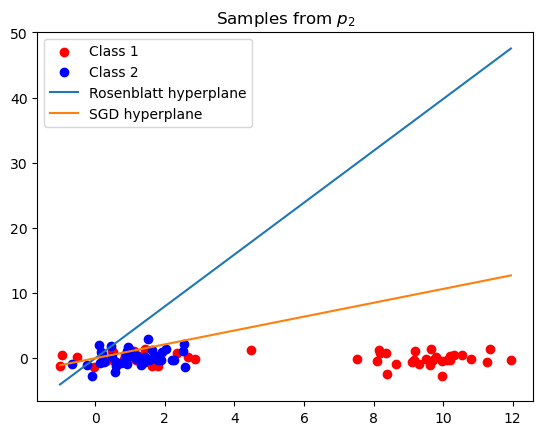

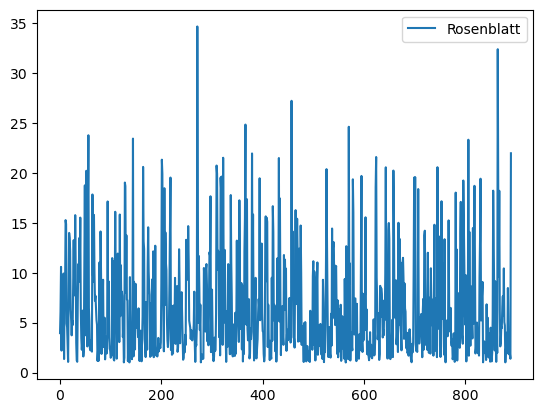

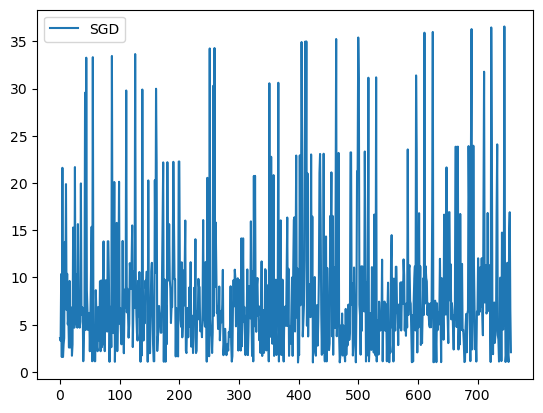

In [114]:
X=X2
Y=Y2

# FILL HERE

plt.scatter(X[Y==1,0],X[Y==1,1],label='Class 1',c='r')
plt.scatter(X[Y==-1,0],X[Y==-1,1],label='Class 2',c='b')

x=np.linspace(min(X[:,0]),max(X[:,0]))

w_c, b_c, error_c = train_classic_perceptron(X,Y,2000)
y_c = w_c[0]*x/w_c[1]

w_s, b_s, error_s = train_SGD_perceptron(X,Y,2000, eta=0.0001)
y_s = w_s[0]*x/w_s[1]


plt.plot(x,y_c, label='Rosenblatt hyperplane')
plt.plot(x,y_s, label='SGD hyperplane')
plt.title('Samples from $p_2$')
plt.legend()
plt.show()




plt.plot(error_c, label='Rosenblatt')
plt.legend()
plt.show()
plt.plot(error_s,label='SGD')
plt.legend()
plt.show()

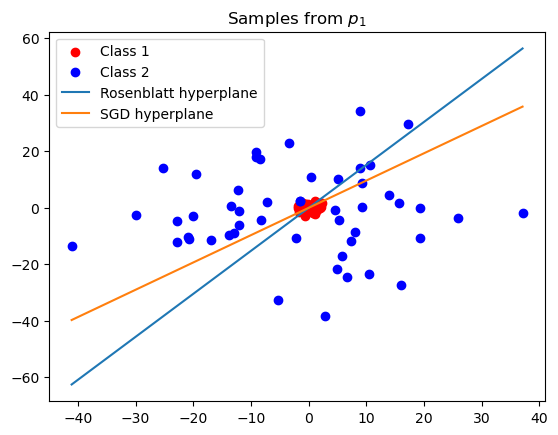

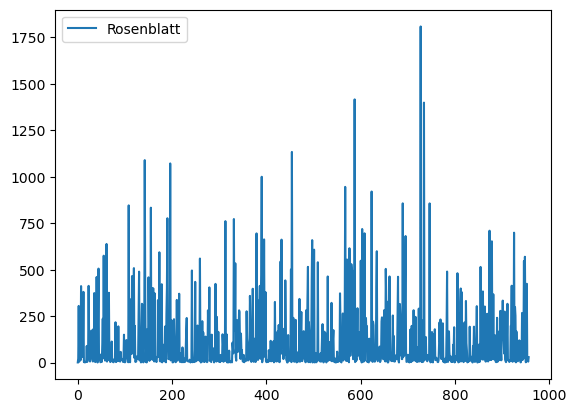

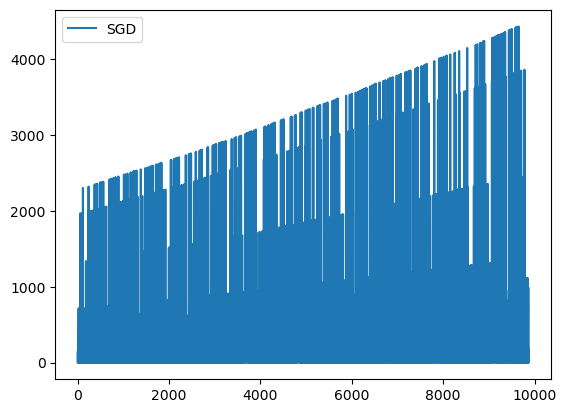

In [115]:
X=X1
Y=Y1

# FILL HERE

plt.scatter(X[Y==1,0],X[Y==1,1],label='Class 1',c='r')
plt.scatter(X[Y==-1,0],X[Y==-1,1],label='Class 2',c='b')
x=np.linspace(min(X[:,0]),max(X[:,0]))


w_c, b_c, error_c = train_classic_perceptron(X,Y,2000)
y_c = w_c[0]*x/w_c[1]

w_s, b_s, error_s = train_SGD_perceptron(X,Y,20000, eta=0.00001)
y_s = w_s[0]*x/w_s[1]



plt.plot(x,y_c, label='Rosenblatt hyperplane')
plt.plot(x,y_s, label='SGD hyperplane')
plt.title('Samples from $p_1$')
plt.legend()
plt.show()



plt.plot(error_c, label='Rosenblatt')
plt.legend()
plt.show()
plt.plot(error_s,label='SGD')
plt.legend()
plt.show()

__Q6:__ Would you classify tanks on satellite images with a Perceptron? (source: https://www.jefftk.com/p/detecting-tanks )